In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df=pd.read_csv("imbd.csv")

In [17]:
# Clean 'Gross' column: remove commas and convert to float

In [18]:
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [19]:
# Clean 'Runtime' column: extract numeric part

In [20]:
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_20120\917835979.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)


In [21]:
# Drop missing values for core analysis

In [22]:
df_clean = df.dropna(subset=['Overview', 'Gross', 'Genre', 'IMDB_Rating'])

In [23]:
!pip install vaderSentiment

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [25]:
df_clean = df.dropna(subset=['Overview', 'Gross', 'Genre', 'IMDB_Rating'])

In [26]:
sia = SentimentIntensityAnalyzer()
df_clean['Sentiment_Compound'] = df_clean['Overview'].apply(lambda x: sia.polarity_scores(x)['compound'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20120\635760087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sentiment_Compound'] = df_clean['Overview'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [40]:
#  Genre-wise Sentiment Analysis
genre_sentiment = (
    df_clean.assign(Primary_Genre=df_clean['Genre'].str.split(',').str[0])
    .groupby('Primary_Genre')['Sentiment_Compound']
    .mean()
    .sort_values(ascending=False)
)

C:\Users\HP\AppData\Local\Temp\ipykernel_20120\1326361848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sentiment.values, y=genre_sentiment.index, palette='viridis')


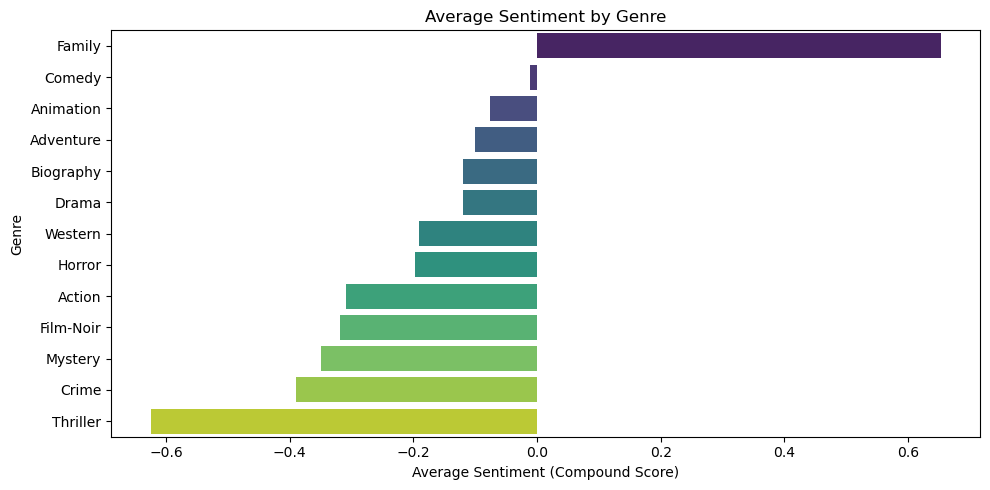

In [42]:
# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=genre_sentiment.values, y=genre_sentiment.index, palette='viridis')
plt.title("Average Sentiment by Genre")
plt.xlabel("Average Sentiment (Compound Score)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [44]:
#  Regression Model to Predict Gross
features = df_clean[['IMDB_Rating', 'Runtime', 'Sentiment_Compound']].copy()
target = df_clean['Gross']

In [46]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [48]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predict
y_pred = model.predict(X_test)

In [52]:
# Metrics
print("🔍 Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

🔍 Model Evaluation:
R² Score: 0.02213770457213493
RMSE: 117724421.01945823


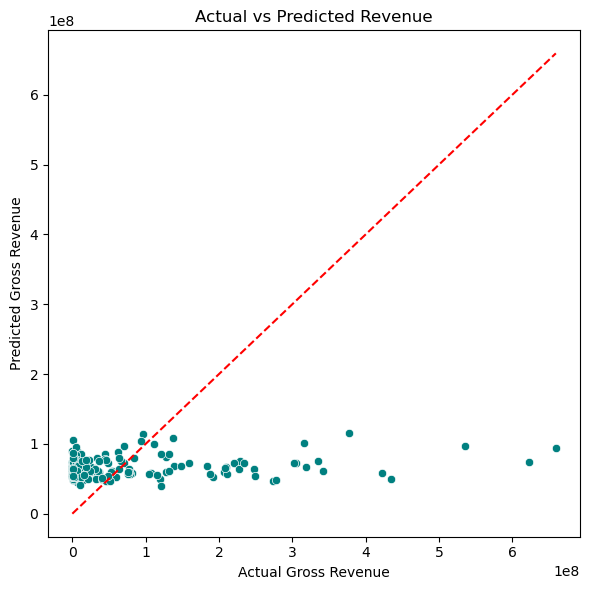

In [54]:
# 📊 Plot Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Gross Revenue")
plt.ylabel("Predicted Gross Revenue")
plt.title("Actual vs Predicted Revenue")
plt.tight_layout()
plt.show()

 Predictive Model Summary
Objective: Predict movie gross revenue using a regression model.

Model Evaluation Metrics:

R² Score: 0.022 — Indicates that the model explains only 2.2% of the variance in gross revenue. This suggests the model has low predictive power.

RMSE: Approximately 117.7 million — A high error margin in predicting revenue values.

Visual Diagnostic:

A scatter plot comparing actual vs predicted revenue was generated.

The red dashed line in the plot represents a perfect prediction line.

Most points deviate significantly from this line, reinforcing the model’s underwhelming performance.

